<a href="https://colab.research.google.com/github/MatiasBlanco0/Trabajo-Practico-Netflix/blob/main/Trabajo_Practico_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importante

## Librerias

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

Importamos `files` de `google.colab` para poder subir el archivo csv.

Importamos `pandas` para poder leer y modificar el archivo csv.

Importamos `matplotlib.pyplot` para poder hacer graficos

## Subir Archivo CSV

In [3]:
uploaded = files.upload()

Saving NetflixHistory.csv to NetflixHistory.csv


## Leer y preparar el archivo CSV
Correr una vez por sesion

Guardamos el archivo csv en una variable llamada `df`por dataframe

In [8]:
df = pd.read_csv("/content/NetflixHistory.csv")

Correr esto para filtrar los dispositivos indicados. `inplace=True` sirve para que la funcion sobreescriba el data frame en vez de devolver una copia

In [9]:
devicesToIgnore = ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick']
for deviceToIgnore in devicesToIgnore:
  df.drop(df[df['Device Type'] == deviceToIgnore].index, inplace=True)

Correr una vez, sino tira error. Porfa 🙏

In [10]:
def convertTextToSeconds(string):
  # El string de duration es como '01:20:14'
  hours, minutes, seconds = string.split(":")
  return int(seconds) + (int(minutes) + int(hours) * 60) * 60

# Reemplazo duration con la duracion en segundos
df['Duration'] = df['Duration'].apply(convertTextToSeconds)

Separar peliculas y series en distintos data frames

In [23]:
# Filtrado los trailers, hooks, recaps y los teaser_trailers
peliculasYSeries = df[pd.isna(df['Supplemental Video Type'])]
series = peliculasYSeries[peliculasYSeries['Title'].str.contains("Capítulo")]
peliculas = peliculasYSeries[~peliculasYSeries['Title'].str.contains("Capítulo")]

# Ejercicios

## A. Contabilizar el dispositivo con el que más títulos se reprodujeron.

Nosotros contamos como titulo al titulo unico, es decir, si se ve una pelicula dos veces, esto cuenta como una vez

In [17]:
devices = {}
# Iteramos por cada dispositivo del dataframe y si no esta lo agregamos con un valor
for device in df['Device Type']:
  if device not in devices:
    # Sacamos la cuenta de valores de la serie Title donde el Device Type es igual al del device actual, lo convertimos a un diccionario y sacamos las keys,
    # porque es lo que nos interesa (los nombres de los titulos)
    # Al final devolvemos el largo para saber cuantos titulos se vieron en ese dispositivo
    devices[device] = len(df[df['Device Type'] == device]['Title'].value_counts().to_dict().keys())

# Utilizamos la funcion sorted para ordenar en base a los valores, accediendolos mediante devices.items() y en el callback de key devolviendo el valor.
# Ademas de decir que los ordene de mayor a menor
# Esto devuelve una lista de tuplas, por eso despues los convertimos a un diccionario
devices = sorted(devices.items(), key=lambda item: item[1], reverse=True)
# Convertir a diccionario el primer item
dict(devices[:1])

{'Apple Apple TV 4 Apple TV': 1920}

El dispositivo en el que mas titulos se reprodujeron fue: Apple Apple TV 4 Apple TV, con 1920 titulos

## B. Encontrar la película con más ocurrencias y la película con mayor duración total.


In [25]:
# peliculas['Title'].value_counts().to_dict() devuelve un diccionario con el titulo como key y la cantidad de ocurrencias como el valor
titulosPeliculas = peliculas['Title'].value_counts().to_dict()
# La funcion sorted es igual que en el ejercicio A. Solo que convertimos a diccionario los primeros 3 items
print("Pelicula con mas ocurrencias: ")
print(dict(sorted(titulosPeliculas.items(), key=lambda item: item[1], reverse=True)[:3]))
print()

# Por cada titulo unico sumamos la duracion de todas las ocurrencias
for titulo in titulosPeliculas.keys():
  titulosPeliculas[titulo] = sum(peliculas[peliculas['Title'] == titulo]['Duration'])

# La funcion sorted es igual que la anterior
print("Pelicula con mayor duracion total (en segundos): ")
print(dict(sorted(titulosPeliculas.items(), key=lambda item: item[1], reverse=True)[:3]))

Pelicula con mas ocurrencias: 
{'Star Wars: El Imperio contraataca': 7, 'El código enigma': 7, '007 Operación Skyfall': 6}

Pelicula con mayor duracion total (en segundos): 
{'Star Wars: El Imperio contraataca': 29433, 'Iron Man: El Hombre de Hierro': 21718, 'Star Wars: Una nueva esperanza': 20394}


Las peliculas con mas ocurrencias son Star Wars: El Imperio contraataca y El codigo enigma con 7 reproducciones.

La pelicula con mayor duracion total es Star Wars: El Imperio contraataca con 29433 segundos, es decir, 08:10:33

## C. Generar un TOP “N” de series vistas y graficar.
## 1.   Por tiempo visto
## 2.   Por ocurrencias

In [36]:
# series['Title'].value_counts().to_dict() devuelve un diccionario con el titulo como key y la cantidad de ocurrencias como el valor
titulosSeries1 = series['Title'].value_counts().to_dict()
titulosSeries2 = series['Title'].value_counts().to_dict()

In [74]:
# Poner numero de top
top = 5

### Por tiempo visto

In [79]:
# Por cada titulo unico sumamos la duracion de todas las ocurrencias
for titulo in titulosSeries2.keys():
  titulosSeries2[titulo] = sum(series[series['Title'] == titulo]['Duration'])

# La funcion sorted es igual que en el ejercicio A. Solo que convertimos a diccionario los primeros items en base al numero de top
datos1 = dict(sorted(titulosSeries2.items(), key=lambda item: item[1], reverse=True)[:top])

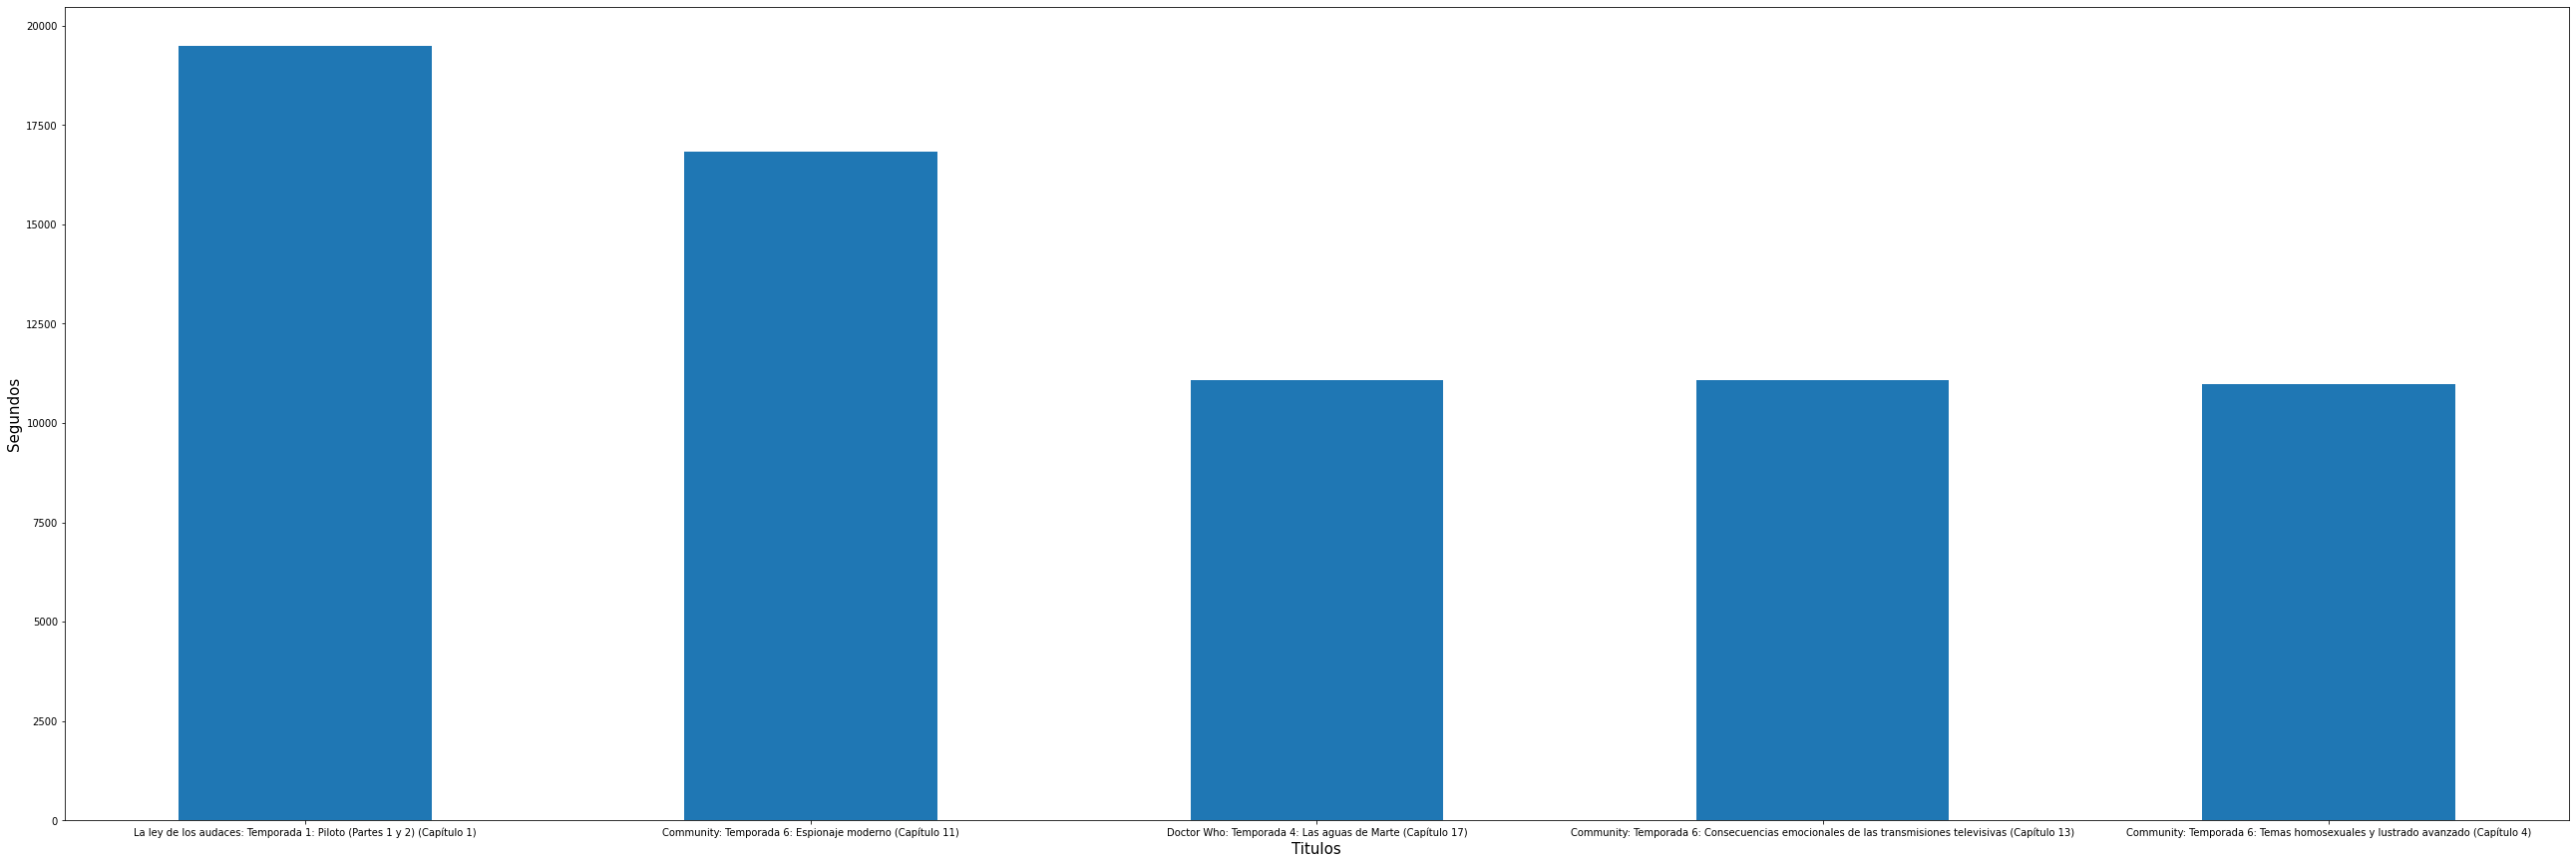

In [78]:
plt.figure(figsize=(9 * top, 3 * top))
plt.bar(datos1.keys(), datos1.values(), width=0.5)
plt.xlabel("Titulos", fontsize=15)
plt.ylabel("Segundos", fontsize=15)
plt.show()

### Por ocurrencias

In [80]:
# La funcion sorted es igual que la anterior
datos2 = dict(sorted(titulosSeries1.items(), key=lambda item: item[1], reverse=True)[:top])

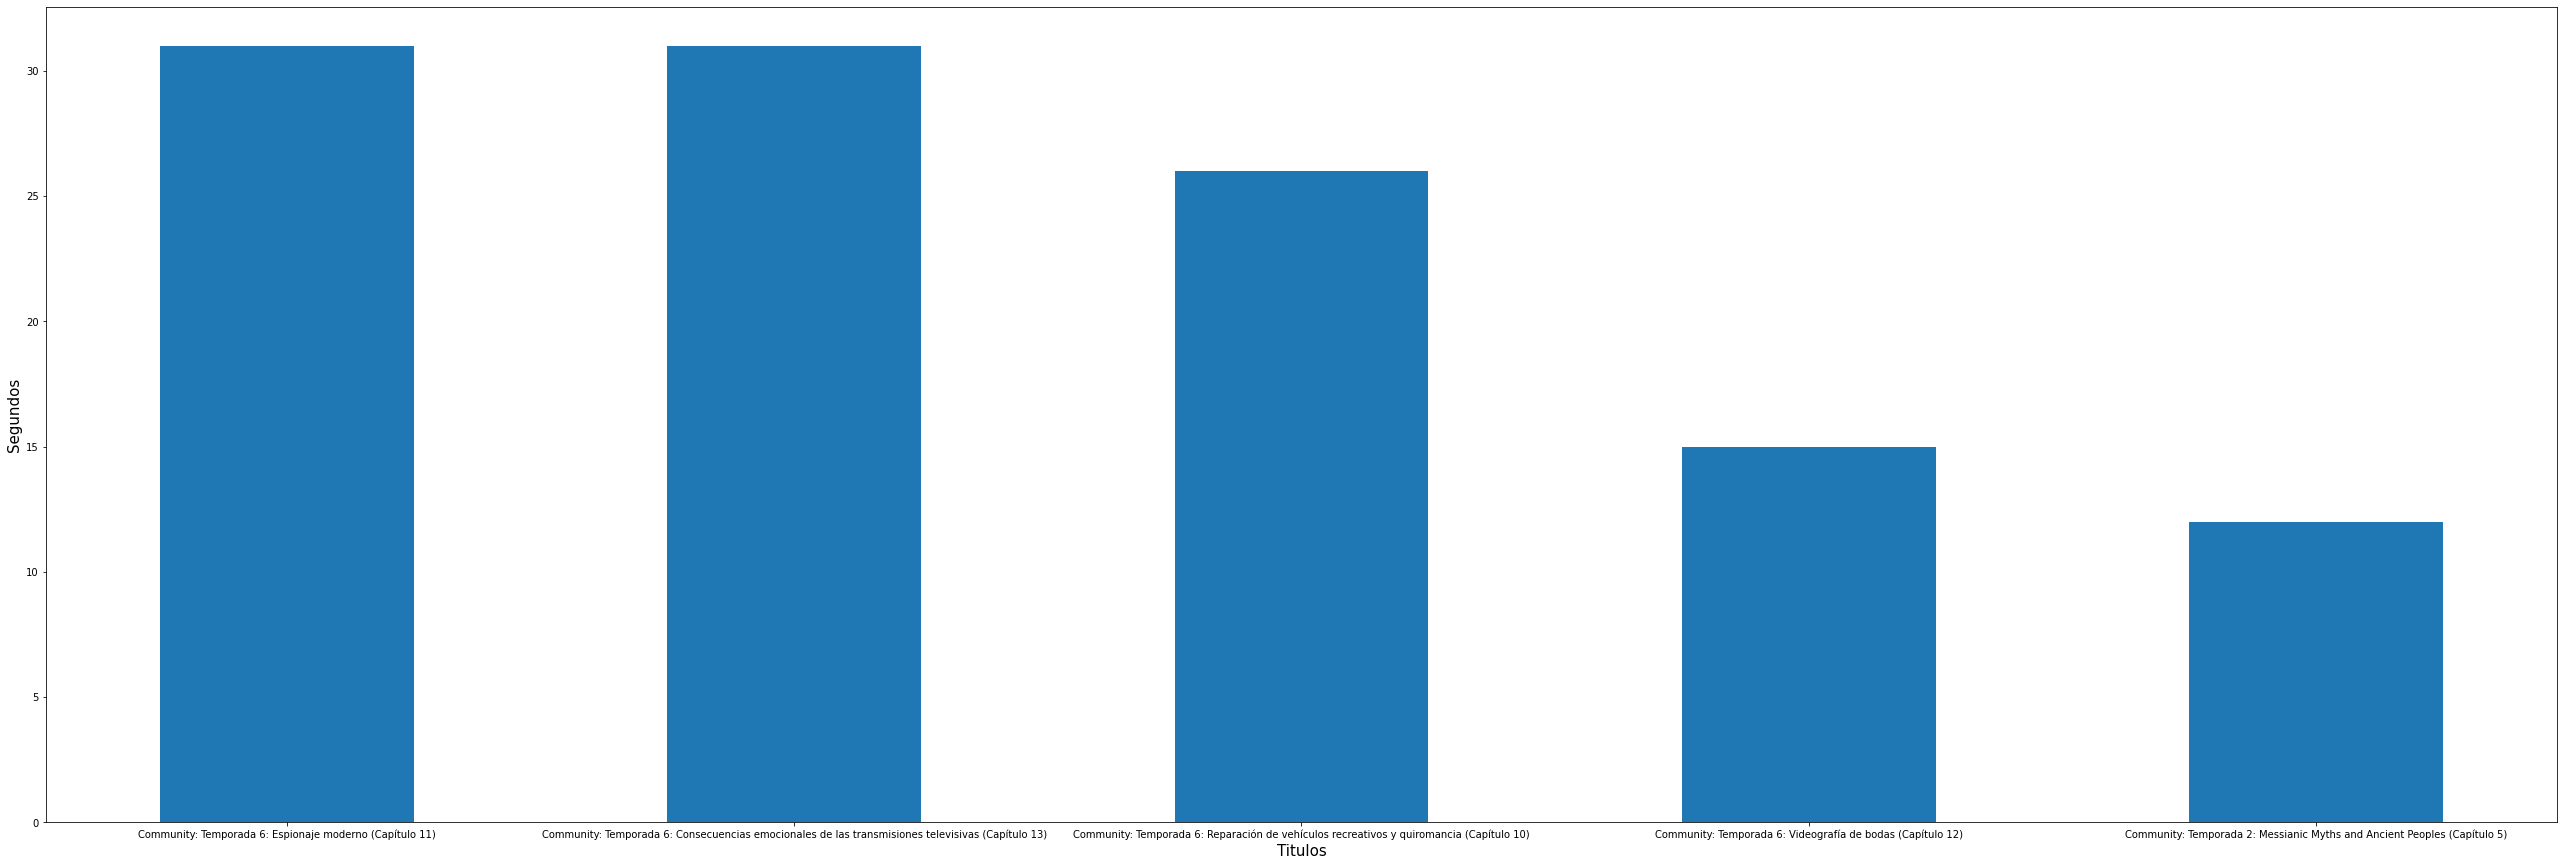

In [81]:
plt.figure(figsize=(9 * top, 3 * top))
plt.bar(datos2.keys(), datos2.values(), width=0.5)
plt.xlabel("Titulos", fontsize=15)
plt.ylabel("Segundos", fontsize=15)
plt.show()

## D. Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.


## E. Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.


## F. Total de días de todos los títulos reproducidos.


In [98]:
# peliculasYSeries['Title'].value_counts().to_dict() devuelve un diccionario con las keys como el titulo y la cantidad de ocurrencias como el valor
titulosGenerales = peliculasYSeries['Title'].value_counts().to_dict()

segundosTotales = 0

# Por cada titulo unico sumamos la duracion de todas las ocurrencias a segundosTotales
for titulo in titulosGenerales.keys():
  segundosTotales += sum(peliculasYSeries[peliculasYSeries['Title'] == titulo]['Duration'])

# convertimos los segundos totales a dias, horas, minutos y segundos
dias = segundosTotales/86400
horas = (dias - int(dias)) * 24
minutos = (horas - int(horas)) * 60
segundos = (minutos - int(minutos)) * 60

In [99]:
# Mostramos el tiempo total en el formato dd:hh:mm:ss
str(int(dias))+":"+str(int(horas))+":"+str(int(minutos))+":"+str(int(segundos))

'99:18:11:41'